## Breadth first search (DFS)

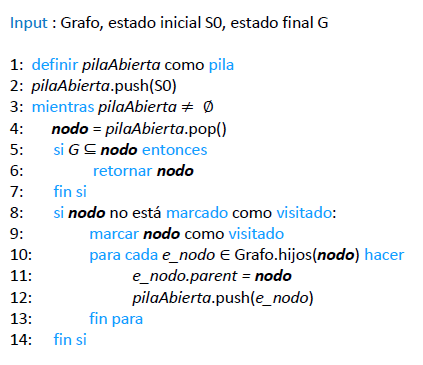

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [111]:
class Nodo:
    def __init__(self,nodo,nodosHijos=[],nodoPadre=None):
        self.nodo = nodo
        self.nodosHijos = nodosHijos
        self.nodoPadre = None
    def __str__(self):
        formato = "{0}"
        return formato.format(self.nodo)
    def __eq__(self, obj):
        return (self.nodo==obj.nodo)
    def __lt__(self, other):
        return self.nodo < other.nodo

In [4]:
def crear_ruta_nodos(nodo):
    nodoTemp =nodo
    listaNodos=[]
    while(nodoTemp):
        listaNodos.insert(0,nodoTemp)
        nodoTemp = nodoTemp.nodoPadre
    return listaNodos 

In [5]:
def graficar_ruta_nodos(lista_nodos):
    grap = nx.DiGraph()        
    for i in range(len(lista_nodos)-1):
        j = i+1
        nodoA = lista_nodos[i]           
        nodoB = lista_nodos[j]        
        grap.add_edges_from([(str(nodoA), str(nodoB))],weight=j)  
    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in grap.edges(data=True)])
    pos_labels=nx.circular_layout(grap)
    plt.figure(figsize=(10,5)) 
    grap.size(weight='weight')
    nx.draw_networkx_edge_labels(grap,pos_labels,edge_labels=edge_labels)
    nx.draw(grap,pos_labels, node_size=1000,with_labels=True, font_weight='bold')        
    plt.show()

In [6]:
def imprimir_lista_visitados(nodosVisitados):    
    print("Nodos Visitados")
    for nodoVis in nodosVisitados:
        print(str(nodoVis))
    print("----------------------")

In [121]:
class DFS:  
    def buscar(self,nodoInicial,nodoMeta):
        nodosAbiertos=[]
        nodosVisitados=[]    
        nodosAbiertos.append(nodoInicial)  
        contador = 0
        while nodosAbiertos:           
            nodo=nodosAbiertos.pop(0) 
            if nodo==nodoMeta:     
                print('Meta')
                return nodo,True,nodosVisitados                                   
            contador = contador +1    
            if not nodo in nodosVisitados:
                nodosVisitados.append(nodo)
                listaReverso = sorted(nodo.nodosHijos, key=lambda x: x.nodo, reverse=True)
                for nodohijo in listaReverso:  
                    nodohijo.nodoPadre = nodo                                                 
                    nodosAbiertos.insert(0,nodohijo)
        return None,False,nodosVisitados

In [116]:
A = Nodo("A")
B = Nodo("B")
C = Nodo("C")
D = Nodo("D")
E = Nodo("E")
F = Nodo("F")
G = Nodo("G")
H = Nodo("H")
I = Nodo("I")
K = Nodo("K")
L = Nodo("L")

A.nodosHijos=[B,C]
B.nodosHijos=[D,E,F]
F.nodosHijos=[H]
H.nodosHijos=[I]
C.nodosHijos=[G]
D.nodosHijos=[K]
K.nodosHijos=[L]

Meta


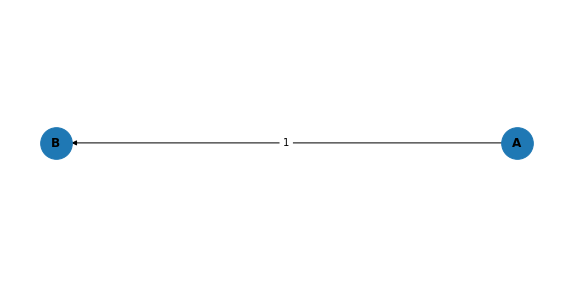

Nodos Visitados
A
----------------------


In [113]:
dfs = DFS()
nodoMeta,estado,visitados = dfs.buscar(A,B)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

Meta
E


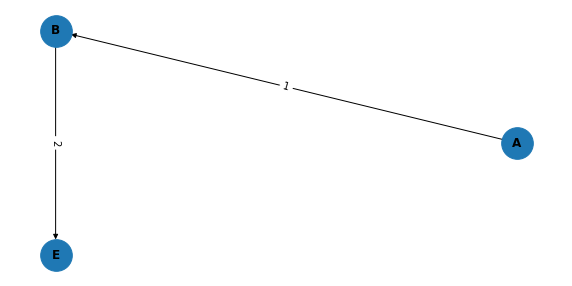

Nodos Visitados
A
B
D
K
L
----------------------


In [122]:
dfs = DFS()
nodoMeta,estado,visitados = dfs.buscar(A,E)
print(nodoMeta)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

Meta
I


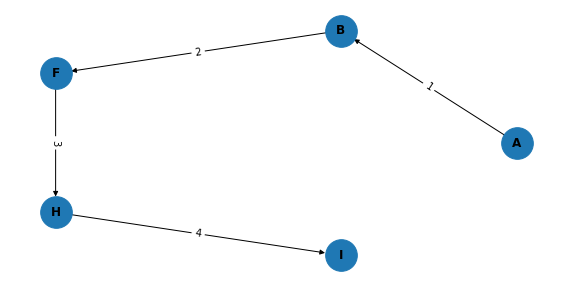

Nodos Visitados
A
B
D
K
L
E
F
H
----------------------


In [123]:
dfs = DFS()
nodoMeta,estado,visitados = dfs.buscar(A,I)
print(nodoMeta)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)